In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=2500, n_classes=2, n_features=100, n_informative=75, n_redundant=25, n_clusters_per_class=1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.3)
print(X_train.shape, X_test.shape)

(1750, 100) (750, 100)


In [4]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=500)
log.fit(X_train, y_train);

LogisticRegression
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       375
           1       0.96      0.97      0.96       375

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



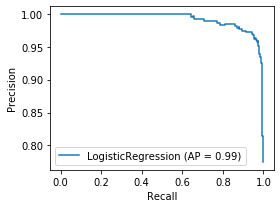

In [5]:
from util import plot_lr_class

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_lr_class(log, X_test, y_test, ax)
fig.tight_layout()
fig.savefig("images/Toy-LogisticRegression-PRCurve.png")

In [6]:
from algorithms import SimpleESClassifier
from objectives import CrossEntropyObjective

ses = SimpleESClassifier(objective=CrossEntropyObjective(), n_iter=300, random_state=0)
ses.fit(X_train, y_train);

100%|██████████| 300/300 [00:09<00:00, 30.29it/s]


SimpleESClassifier
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       375
           1       0.95      0.93      0.94       375

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



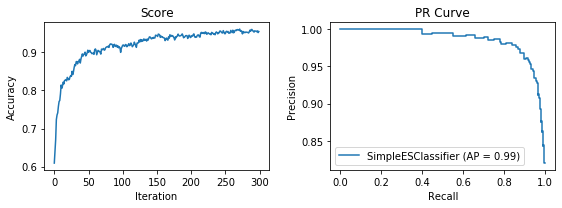

In [7]:
from util import plot_class

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(ses, X_test, y_test, axes)
fig.tight_layout()
fig.savefig("images/Toy-SimpleESClassifier-PRCurve.png")

In [8]:
from algorithms import GeneticESClassifier

ges = GeneticESClassifier(objective=CrossEntropyObjective(), n_iter=300, random_state=0, sigma=2.5)
ges.fit(X_train, y_train);

100%|██████████| 300/300 [00:11<00:00, 26.09it/s]


GeneticESClassifier
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       375
           1       0.95      0.94      0.94       375

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



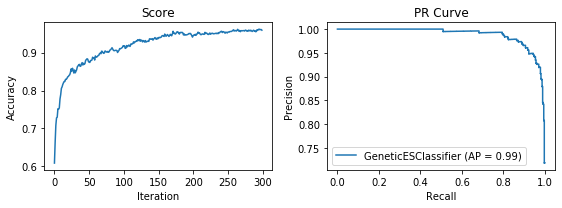

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(ges, X_test, y_test, axes)
fig.tight_layout()
fig.savefig("images/Toy-GeneticESClassifier-PRCurve.png")

In [10]:
from algorithms import NaturalESClassifier

nes = NaturalESClassifier(objective=CrossEntropyObjective(), n_iter=300, random_state=0, sigma=0.2)
nes.fit(X_train, y_train);

100%|██████████| 300/300 [00:06<00:00, 44.21it/s]


NaturalESClassifier
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       375
           1       0.97      0.90      0.93       375

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



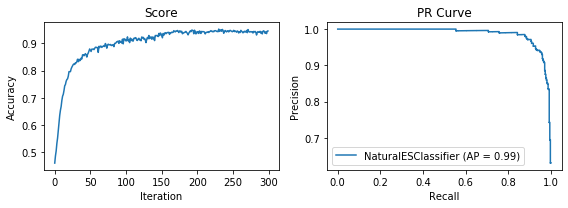

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(nes, X_test, y_test, axes)
fig.tight_layout()
fig.savefig("images/Toy-NaturalESClassifier-PRCurve.png")

In [12]:
from algorithms import DifferentialEvolutionClassifier

dev = DifferentialEvolutionClassifier(objective=CrossEntropyObjective(), n_iter=1000, random_state=0, bounds=(-100, 100), lmbda=1.3)
dev.fit(X_train, y_train);

100%|██████████| 1000/1000 [00:05<00:00, 187.12it/s]


DifferentialEvolutionClassifier
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       375
           1       0.90      0.88      0.89       375

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750



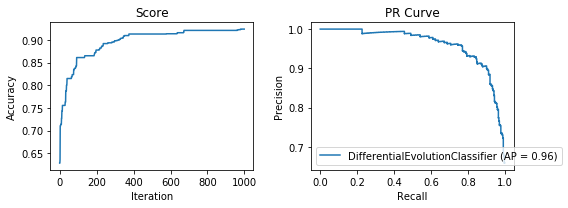

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(dev, X_test, y_test, axes)
fig.tight_layout()
fig.savefig("images/Toy-DifferentialEvolutionClassifier-PRCurve.png")

In [14]:
from util import cross_val

ses_score = cross_val(ses, X, y)

100%|██████████| 300/300 [00:07<00:00, 39.60it/s]


In [15]:
ges_score = cross_val(ges, X, y)

100%|██████████| 300/300 [00:10<00:00, 27.61it/s]


In [16]:
nes_score = cross_val(nes, X, y)

100%|██████████| 300/300 [00:09<00:00, 32.21it/s]


In [17]:
dev_score = cross_val(dev, X, y)

100%|██████████| 1000/1000 [00:06<00:00, 147.78it/s]


In [18]:
log_score = cross_val(log, X, y)

In [19]:
print("SimpleESClassifier Accuracy:               %0.5f (+/- %0.5f)" % (ses_score.mean(), ses_score.std() * 2))
print("GeneticESClassifier Accuracy:              %0.5f (+/- %0.5f)" % (ges_score.mean(), ges_score.std() * 2))
print("NaturalESClassifier Accuracy:              %0.5f (+/- %0.5f)" % (nes_score.mean(), nes_score.std() * 2))
print("DifferentialEvolutionClassifier Accuracy:  %0.5f (+/- %0.5f)" % (dev_score.mean(), dev_score.std() * 2))
print("LogisticRegression Accuracy:               %0.5f (+/- %0.5f)" % (log_score.mean(), log_score.std() * 2))

SimpleESClassifier Accuracy:               0.93000 (+/- 0.02400)
GeneticESClassifier Accuracy:              0.94040 (+/- 0.03747)
NaturalESClassifier Accuracy:              0.95880 (+/- 0.01353)
DifferentialEvolutionClassifier Accuracy:  0.91080 (+/- 0.03825)
LogisticRegression Accuracy:               0.96080 (+/- 0.01229)
